<a href="https://colab.research.google.com/github/DanaeMartinez01/Metodos-Numericos-/blob/main/Polinomiointerpolante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

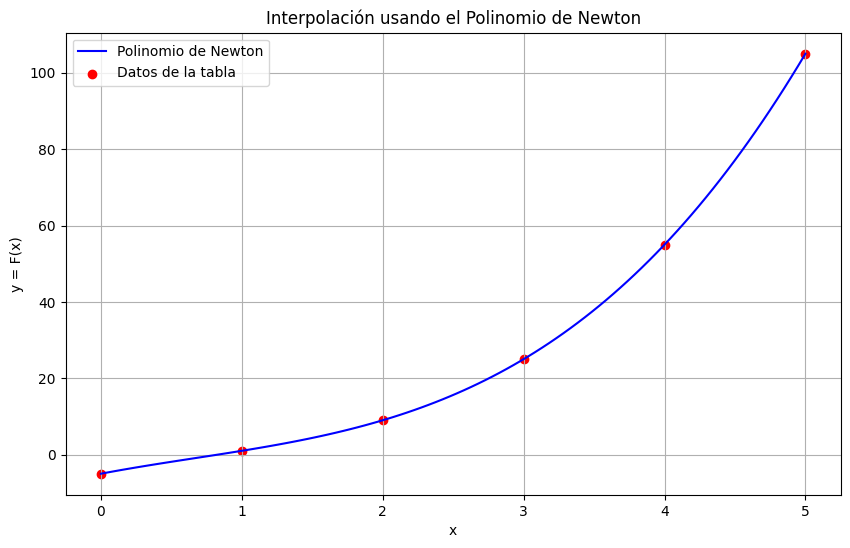

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def newton_divided_differences(x, y):
    """
    Calcula la tabla de diferencias divididas de Newton para un conjunto de datos dado.

    Parámetros:
    x (array): Valores de x.
    y (array): Valores de y (F(x)).

    Retorna:
    numpy.ndarray: Tabla de diferencias divididas.
    """
    n = len(x)
    # Crear una tabla para almacenar diferencias divididas
    table = np.zeros((n, n))
    # La primera columna es y
    table[:, 0] = y

    # Calcular las diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i + 1][j - 1] - table[i][j - 1]) / (x[i + j] - x[i])

    return table

def newton_polynomial(x_values, x, table):
    """
    Evalúa el polinomio de Newton en un conjunto de puntos dado.

    Parámetros:
    x_values (float or array): Punto(s) en el que se evaluará el polinomio.
    x (array): Valores de x de los datos originales.
    table (numpy.ndarray): Tabla de diferencias divididas.

    Retorna:
    float or numpy.ndarray: Valor(es) del polinomio de Newton evaluado(s) en x_values.
    """
    n = len(x)
    result = np.zeros_like(x_values, dtype=float)

    # Para cada valor en x_values, calcular el polinomio de Newton
    for idx, x_val in enumerate(np.atleast_1d(x_values)):
        term = 1
        result[idx] = table[0, 0]
        for i in range(1, n):
            term *= (x_val - x[i - 1])
            result[idx] += table[0, i] * term

    return result

# Datos de la tabla
x = np.array([0, 1, 2, 3, 4, 5], dtype=float)
y = np.array([-5, 1, 9, 25, 55, 105], dtype=float)

# Calcular la tabla de diferencias divididas
table = newton_divided_differences(x, y)

# Generar puntos para graficar el polinomio
x_plot = np.linspace(min(x), max(x), 100)
y_plot = newton_polynomial(x_plot, x, table)

# Graficar los puntos de la tabla y el polinomio interpolante
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="Polinomio de Newton", color="blue")
plt.scatter(x, y, color="red", label="Datos de la tabla")
plt.xlabel("x")
plt.ylabel("y = F(x)")
plt.legend()
plt.title("Interpolación usando el Polinomio de Newton")
plt.grid()
plt.show()